## **Feature scaling**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data=data.iloc[:,2:]
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


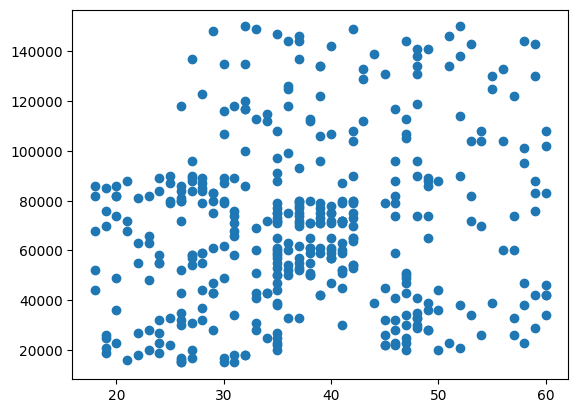

In [ ]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
! pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:,:2]
y = data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6511 - loss: 2136.3286 - val_accuracy: 0.3500 - val_loss: 1000.5035
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3656 - loss: 850.7164 - val_accuracy: 0.6500 - val_loss: 394.1994
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6230 - loss: 304.3159 - val_accuracy: 0.3500 - val_loss: 192.1602
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5045 - loss: 163.4194 - val_accuracy: 0.3500 - val_loss: 273.1170
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4365 - loss: 218.2692 - val_accuracy: 0.3500 - val_loss: 153.0136
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3895 - loss: 177.8002 - val_accuracy: 0.3500 - val_loss: 51.5114
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4164 - loss: 77.1141 - val_accuracy: 0.3500 - val_loss: 73.7642
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4995 - loss:

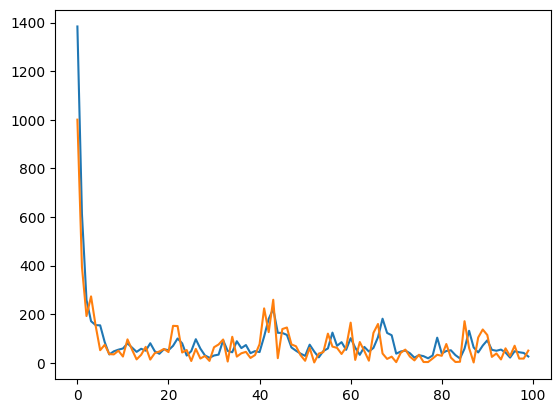

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

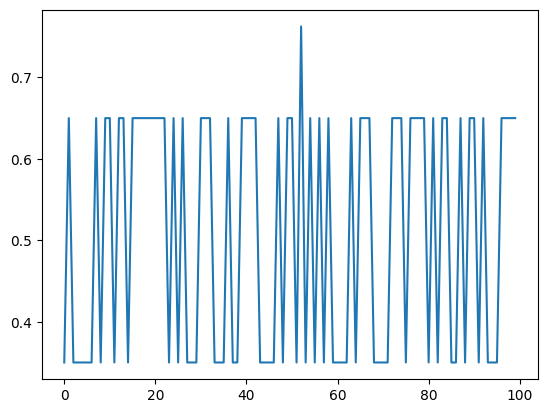

In [ ]:
plt.plot(hist.history["val_accuracy"])

### **Appling scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

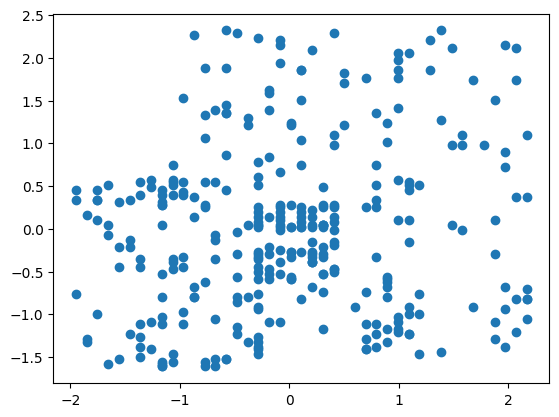

In [ ]:
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1])
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8955 - loss: 0.2750 - val_accuracy: 0.9375 - val_loss: 0.1771
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9141 - loss: 0.2487 - val_accuracy: 0.9375 - val_loss: 0.1771
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8989 - loss: 0.2642 - val_accuracy: 0.9375 - val_loss: 0.1777
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9150 - loss: 0.2378 - val_accuracy: 0.9375 - val_loss: 0.1764
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9249 - loss: 0.2064 - val_accuracy: 0.9375 - val_loss: 0.1765
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9390 - loss: 0.2102 - val_accuracy: 0.9375 - val_loss: 0.1759
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9010 - loss: 0.2569 - val_accuracy: 0.9375 - val_loss: 0.1765
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9119 - loss: 0.2531 - val_accuracy: 0.9375 - 

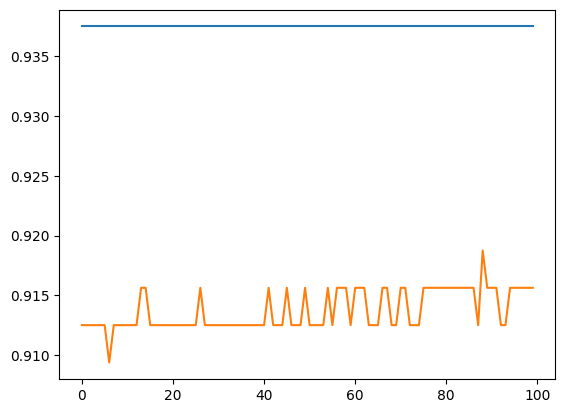

In [ ]:
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['accuracy'])

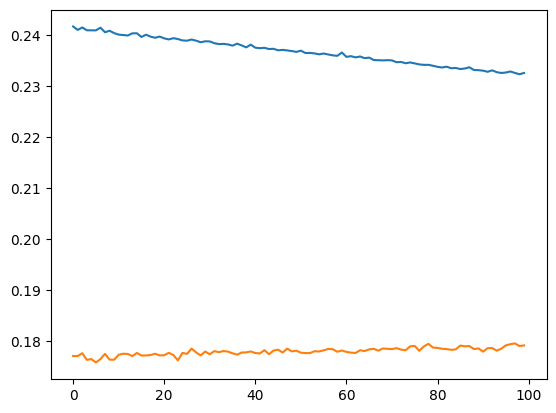

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])